In [1]:
# https://github.com/chashikajw/sinhala-hate-speech-detection/blob/master/sinhala_hatespeech_detection.ipynb

import pandas as pd

# Read the CSV file into a DataFrame
column_names = ["text", "is_hate"]

df = pd.read_csv('1.preprocessed_data.csv', on_bad_lines='skip', sep=",", encoding='iso-8859-1', header=0, names=column_names)
df['is_hate'] = df['is_hate'].astype(bool)
df['text'] = df['text'].astype('str')
df.head()

,text,is_hate
0,ponnayo danne kellek aduwa gaman laga inna kol...,True
1,ape harak samjeta eka honda adrshyak,False
2,tpita pisuda yako man htuwe atta kiyala aiyo,False
3,kimbak eduwoth ape untath amma thaththawath pe...,True
4,lisan nathawa yanna puluwan yako api dannawa o...,False


In [2]:
from nltk.tokenize import word_tokenize
prev_lengths_arr_singlish = []
after_unique_arr_singlish = []
df_Singlish_unique = pd.DataFrame(columns=["no", "text", "is_hate"])


def getUniqueTokens(myarr):
    myset = list(set(myarr))
    return myset

def joinWordsIntoSentence(dataframe):
    for itm in range(len(dataframe)):
        words_arr = dataframe['text'][itm]
        dataframe['text'][itm] = ( " ".join( words_arr ))

for r in range(df.shape[0]):
     Sentence_singlish = word_tokenize(df['text'][r])
     prev_lengths_arr_singlish.append(len(Sentence_singlish))
     unique_sentence = getUniqueTokens(Sentence_singlish)
     df_Singlish_unique.loc[r] = [r+1] + [unique_sentence] + [df['is_hate'][r]]
        
     after_unique_arr_singlish.append(len(unique_sentence))
    
joinWordsIntoSentence(df_Singlish_unique)    

/var/folders/8l/0dr6g72x2rq8wcm2j5c630j00000gn/T/ipykernel_1529/1332436128.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['text'][itm] = ( " ".join( words_arr ))
/var/folders/8l/0dr6g72x2rq8wcm2j5c630j00000gn/T/ipykernel_1529/1332436128.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['text'][itm] = ( " ".join( words_arr ))
/var/folders/8l/0dr6g72x2rq8wcm2j5c630j00000gn/T/ipykernel_1529/1332436128.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

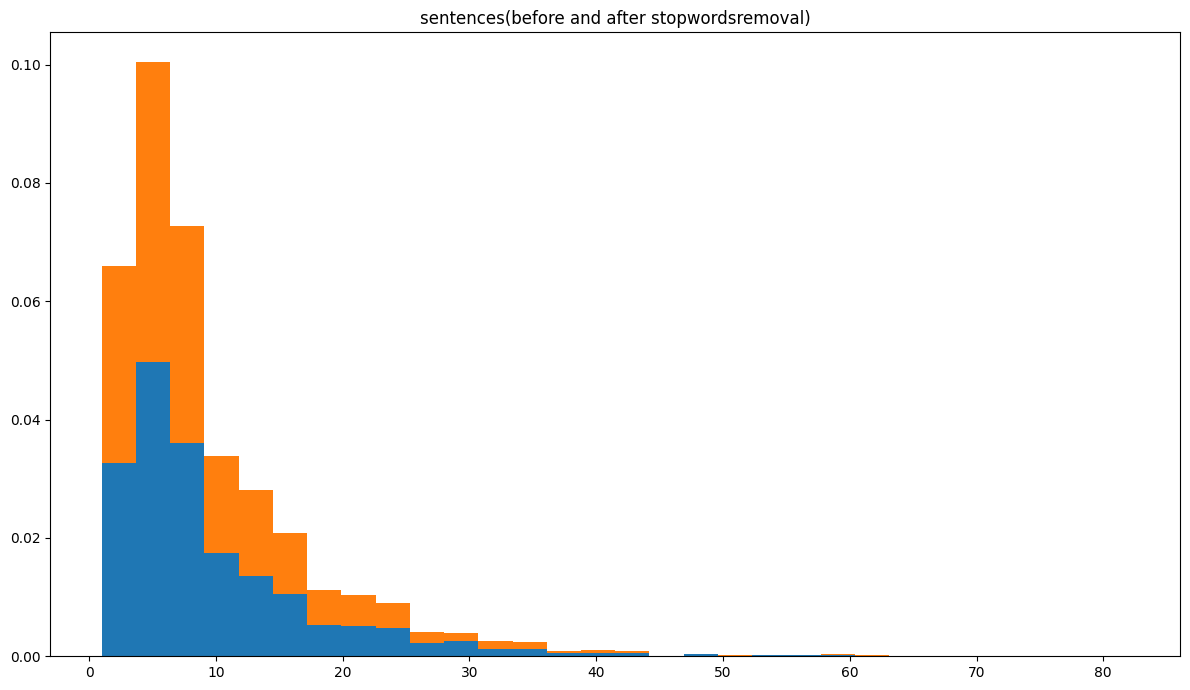

In [3]:
preLenghts = prev_lengths_arr_singlish
afterLenghts = after_unique_arr_singlish

arr3 = []
for i in range(len(preLenghts)):
    ar_i = []
    ar_i.append(preLenghts[i])
    ar_i.append(afterLenghts[i])
    arr3.append(ar_i)
    
    
import numpy as np
myarray3 = np.asarray(arr3)



import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 30
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 7))


labels = ['unique','not unique']

axes.hist(myarray3, n_bins, density=True, histtype='bar', stacked=True,label=labels)
axes.set_title('sentences(before and after stopwordsremoval)')

fig.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X2 = df_Singlish_unique["text"]
y2 = df_Singlish_unique["is_hate"]
X_train_singlish, X_test_singlish, y_train_singlish, y_test_singlish = train_test_split(
    X2,y2, test_size = 0.2, random_state = 0)

In [5]:
def create_bag_of_words(X):
    from sklearn.feature_extraction.text import CountVectorizer
    
    print ('Creating bag of words...')
    # Initialize the "CountVectorizer" object
    
    # In this example features may be single words or two consecutive words
    vectorizer = CountVectorizer()

    
    train_data_features = vectorizer.fit_transform(X)
    
    # Convert to a NumPy array for easy of handling
    train_data_features = train_data_features.toarray()
   
    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names_out()
    print ('Created')
    return vectorizer, vocab, train_data_features

In [6]:
vectorizer2, vocab2, train_data_features2  = (
        create_bag_of_words(X_train_singlish))

Creating bag of words...
Created


In [7]:
def train_logistic_regression(features, label):
    print ("Training model........")
    from sklearn.linear_model import LogisticRegression
    #ml_model = LogisticRegression(C = 100,random_state = 0)
    ml_model = LogisticRegression()
    ml_model.fit(features, label)
    print ('Created')
    return ml_model

def generateModel(vectorizer,train_data_featres,train_data,test_data):
    ml_modelp = train_logistic_regression(train_data_featres, train_data)
    
    ml_model_before = ml_modelp
    test_data_featuresp = vectorizer.transform(test_data)
    # Convert to numpy array
    test_data_featuresp = test_data_featuresp.toarray()
    
    predicted_modl = ml_modelp.predict(test_data_featuresp)
    
    return ml_model_before,predicted_modl

ml_model_before_2,predicdedModel_2 = generateModel(vectorizer2,train_data_features2,y_train_singlish,X_test_singlish)

Training model........
Created


In [8]:
from sklearn.metrics import confusion_matrix

# Define function to calculate the 4 common mertics
def get_metrics(true_labels, predicted_labels):
    correctly_identified_y = predicted_labels == true_labels
    
    print("Confusion metrix: ")
    confusion_met = confusion_matrix(true_labels, predicted_labels)
    print(confusion_met)
    print()
    
    accuracy = np.mean(correctly_identified_y) * 100
    print ('Accuracy = %.0f%%' %accuracy)
    
    precision = (confusion_met[0][0]/(confusion_met[0][0]+confusion_met[1][0]))* 100
    print ('precision = %.1f%%' %precision)
    
    recall = (confusion_met[0][0]/(confusion_met[0][0]+confusion_met[0][1]))* 100
    print ('recall = %.1f%%' %recall)
    
    F1_Score = 2*((precision*recall)/(precision+recall))
    print ('F1 Score = %.1f%%' %F1_Score)

get_metrics(y_test_singlish,predicdedModel_2)

Confusion metrix: 
[[245  16]
 [ 65 115]]

Accuracy = 82%
precision = 79.0%
recall = 93.9%
F1 Score = 85.8%


In [9]:
# using tf-idf values and ngram model
def create_bag_of_words_new_ngram_tfid(X):
    from sklearn.feature_extraction.text import CountVectorizer
    
    print ('Creating bag of words...')
    # Initialize the "CountVectorizer" object
     
    
    # In this example features may be single words or two consecutive words
    vectorizer = CountVectorizer(analyzer = "char",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 ngram_range = (1,3), \
                                 max_features = 10000) 
     
   

    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of 
    # strings. The output is a sparse array
    train_data_features = vectorizer.fit_transform(X)
    
    # Convert to a NumPy array for easy of handling
    train_data_features = train_data_features.toarray()
    
    # tfidf transform
    from sklearn.feature_extraction.text import TfidfTransformer
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names_out()
   
    return vectorizer, vocab, train_data_features, tfidf_features, tfidf

In [10]:
vectorizer_all_new_ngram, vocab_all_new_ngram, train_data_features_all_new_ngram, tfidf_features_all_new_ngram, tfidf_all_new_ngram  = (
        create_bag_of_words_new_ngram_tfid(X_train_singlish))

Creating bag of words...


In [17]:

def generateModelTFID(vectorizer,tfidf_features,tfidf,y_train_data,Xtest_data):
    model = train_logistic_regression(tfidf_features, y_train_data)
    test_data_featuresp = vectorizer.transform(Xtest_data)
    # Convert to numpy array
    test_data_featuresp = test_data_featuresp.toarray()
    
    test_data_tfidf_features = tfidf.fit_transform(test_data_featuresp)
    # Convert to numpy array
    test_data_tfidf_features = test_data_tfidf_features.toarray()
    
    predictions = model.predict(test_data_tfidf_features)
    prediction_probabilities = model.predict_proba(test_data_tfidf_features)
    
    return model, predictions, prediction_probabilities

model, predictions, prediction_probabilities = generateModelTFID(vectorizer_all_new_ngram,tfidf_features_all_new_ngram,tfidf_all_new_ngram,y_train_singlish,X_test_singlish)
get_metrics(y_test_singlish, predictions)

Training model........
Created
Confusion metrix: 
[[228  33]
 [ 65 115]]

Accuracy = 78%
precision = 77.8%
recall = 87.4%
F1 Score = 82.3%


In [18]:
# Calculate and print the metrics
from sklearn.metrics import classification_report

report = classification_report(y_test_singlish, predictions)
print(report)


              precision    recall  f1-score   support

       False       0.78      0.87      0.82       261
        True       0.78      0.64      0.70       180

    accuracy                           0.78       441
   macro avg       0.78      0.76      0.76       441
weighted avg       0.78      0.78      0.77       441



In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pickle
# values for confusion matrix
cm = confusion_matrix(y_test_singlish, predictions)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_singlish, prediction_probabilities[:, 1])
roc_auc = auc(fpr, tpr)



# save the values to a file
with open('2.5 Bag of N-words with Linear Regression.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)